In [2]:
import pandas as pd
prefix = '14-9F-3C-DA-5B-26'
output_path = '/Volumes/hex/ST-1871742707-res/'
p_707 = pd.read_csv(output_path + 'ST-1871742707_1.0.csv')

p_707.columns

Index(['time', 'window', 'accX', 'accX_std', 'accY', 'accY_std', 'accZ',
       'accZ_std', 'gyrX', 'gyrX_std', 'gyrY', 'gyrY_std', 'gyrZ', 'gyrZ_std',
       'heartR', 'heartR_std', 'SmoothedAirPressure', 'SAP_std',
       'UncalibratedBarometerAltitude', 'UBA_std', 'AirTemperature', 'AT_std',
       'AirPressure', 'AP_std', 'PlethysmogramGreen', 'ple_std', 'alc', 'cig',
       'mood', 'tense', 'tired', 'period', 'rumination', 'socialize',
       'socialize_val', 'sport_time', 'work_time', 'day_sleep', 'phq_1',
       'phq_2'],
      dtype='object')

/Users/Hesham/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  del sys.path[0]


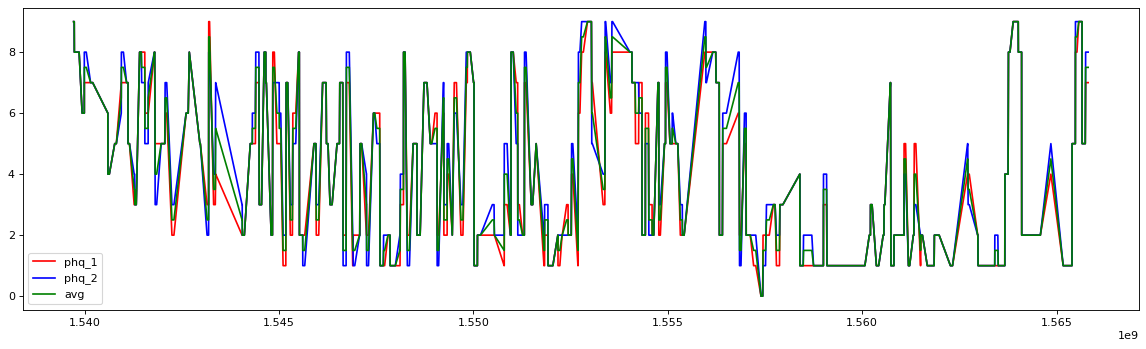

In [4]:
from matplotlib import pyplot
%matplotlib inline
xaxis = p_707[['time']]
yaxis = p_707[['phq_1']]
yaxis2 = p_707[['phq_2']]
avg = p_707[['phq_1', 'phq_2']].mean(axis=1)
fig=pyplot.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
pyplot.plot(xaxis, yaxis, color='red', label='phq_1')
pyplot.plot(xaxis, yaxis2, color='blue', label='phq_2')
pyplot.plot(xaxis, avg, color='green', label='avg')
pyplot.legend()
# pyplot.show()
pyplot.savefig('p707.png')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [6]:
def display_scores(score):
    print('scores:', score)
    print('Mean:', score.mean())
    print('std dev:', score.std())

In [7]:
train_set, test_set = train_test_split(p_707, test_size=0.25, random_state=42, shuffle=True)

In [8]:
X_train = train_set.loc[:,'accX':'day_sleep']
y_train_1 = train_set.loc[:, ['phq_1']].values.ravel()
y_train_2 = train_set.loc[:, ['phq_2']].values.ravel()

X_test = test_set.loc[:,'accX':'day_sleep']
y_test_1 = test_set[['phq_1']].values.ravel()
y_test_2 = test_set[['phq_2']].values.ravel()

In [9]:
X_train.head()

,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,gyrY,gyrY_std,...,mood,tense,tired,period,rumination,socialize,socialize_val,sport_time,work_time,day_sleep
18432,0.90,1.85,-1.24,2.10,9.40,2.10,-0.01,0.19,0.04,0.14,...,5,8,5,0,2,7,100,0,0,0
14663,1.88,1.62,-5.03,1.93,7.63,1.93,0.04,0.35,0.01,0.25,...,3,3,4,0,7,7,95,0,0,0
78173,-4.09,0.03,-8.48,0.03,-2.37,0.03,0.03,0.15,0.03,0.10,...,9,9,10,0,1,83,49,0,0,0
42670,1.08,0.04,-3.87,0.03,8.74,0.03,-0.03,0.20,-0.09,0.41,...,8,8,9,0,1,11,91,0,0,0
70324,1.80,0.03,-7.54,0.03,-6.14,0.03,0.05,0.20,-0.03,0.13,...,5,7,5,0,2,84,90,0,0,0


In [11]:
rnd_reg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=35, n_jobs=-1 ,oob_score=True)
rnd_reg.fit(X_train, y_train_1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=35,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [12]:
y_pred_1 = rnd_reg.predict(X_train)

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
forest_mse = mean_squared_error(y_train_1, y_pred_1)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.459564343228065

In [15]:
y_pred_test_1 = rnd_reg.predict(X_test)

In [16]:
forest_test_mse = mean_squared_error(y_test_1, y_pred_test_1)
forest_test_rmse = np.sqrt(forest_test_mse)
forest_test_rmse

0.4581627651302034

In [25]:
from sklearn.utils import shuffle
y_shuffled = shuffle(y_pred_1)
forest_mse_shuffled = mean_squared_error(y_train_1, y_shuffled)
forest_rmse_shuffled = np.sqrt(forest_mse_shuffled)
forest_rmse_shuffled

3.5448720923018904

In [26]:

forest_scores = cross_val_score(rnd_reg, X_train, y_train_1,scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

scores: [0.46142304 0.46058424 0.45309574 0.45784895 0.45410934 0.45397978
 0.44597072 0.4580297  0.45728676 0.47757641]
Mean: 0.45799046773670593
std dev: 0.0077602669724556005
